In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import mglearn

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False   # 마이너스 부호 깨짐

## 2.3.7 (한국어판 부록) 배깅, 엑스트라 트리, 에이다부스트

In [20]:
from preamble import *
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.datasets import load_breast_cancer

Xm,ym = make_moons(n_samples=100,noise=0.25,random_state=3)
Xm_train,Xm_test,ym_train,ym_test = train_test_split(
    Xm,ym,stratify=ym, random_state=42)

cancer = load_breast_cancer()
Xc_train,Xc_test,yc_train,yc_test = train_test_split(
    cancer.data,cancer.target,random_state=0)

### 배깅

- Bootstrap aggregating의 줄임말
- 분류기가 predict_proba() 메서드 지원하는 경우 확률값을 평균해 예측

In [21]:
# 배깅 사용해 cancer 데이터셋에서 로지스틱 회귀모델을 100개 훈련, 앙상블

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(LogisticRegression(),n_estimators=100,
                           oob_score=True, n_jobs=-1,random_state=42)
bagging.fit(Xc_train,yc_train)

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100,
                  n_jobs=-1, oob_score=True, random_state=42)

- oob_score=True: 매개변수는 부트스트래핑에 포함되지 않은 샘플을 기반으로 훈련된 모델을 평가

In [22]:
print('훈련 세트 정확도: {:.3f}'.format(bagging.score(Xc_train,yc_train)))
print('테스트 세트 정확도: {:.3f}'.format(bagging.score(Xc_test,yc_test)))
print('OOB 샘플의 정확도: {:.3f}'.format(bagging.oob_score_))

훈련 세트 정확도: 0.955
테스트 세트 정확도: 0.937
OOB 샘플의 정확도: 0.944


In [23]:
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(),n_estimators=5,
                           n_jobs=-1,random_state=42)
bagging.fit(Xm_train,ym_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=5,
                  n_jobs=-1, random_state=42)

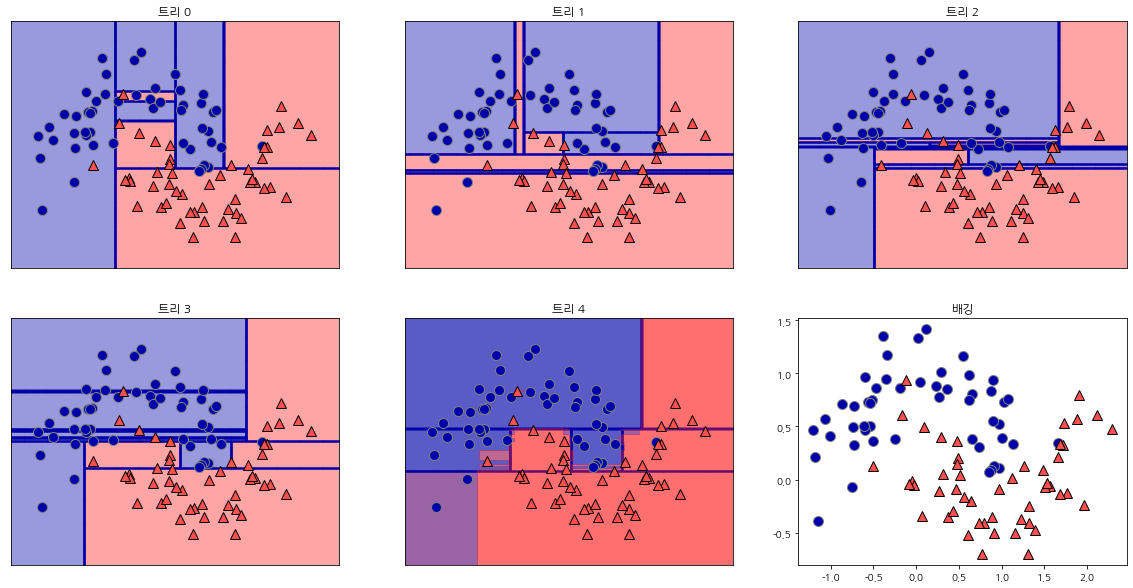

In [24]:
fig,axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(),bagging.estimators_)):
    ax.set_title('트리 {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)
    
mglearn.plots.plot_2d_separator(bagging,Xm,fill=True,ax=axes[-1,1],alpha=.4)
axes[-1,-1].set_title('배깅')
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

In [25]:
bagging = BaggingClassifier(DecisionTreeClassifier(),n_estimators=100,
                           oob_score=True,n_jobs=-1,random_state=42)
bagging.fit(Xc_train,yc_train)

print('훈련 세트 정확도: {:.3f}'.format(bagging.score(Xc_train,yc_train)))
print('테스트 세트 정확도: {:.3f}'.format(bagging.score(Xc_test,yc_test)))
print('008 샘플의 정확도: {:.3f}'.format(bagging.oob_score_))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965
008 샘플의 정확도: 0.948


### 엑스트라 트리

- DecisionTreeClassifier(splitter='random')
- 부트스트랩 샘플링 적용하지 않음
- 각 트리가 만든 확률값을 평균

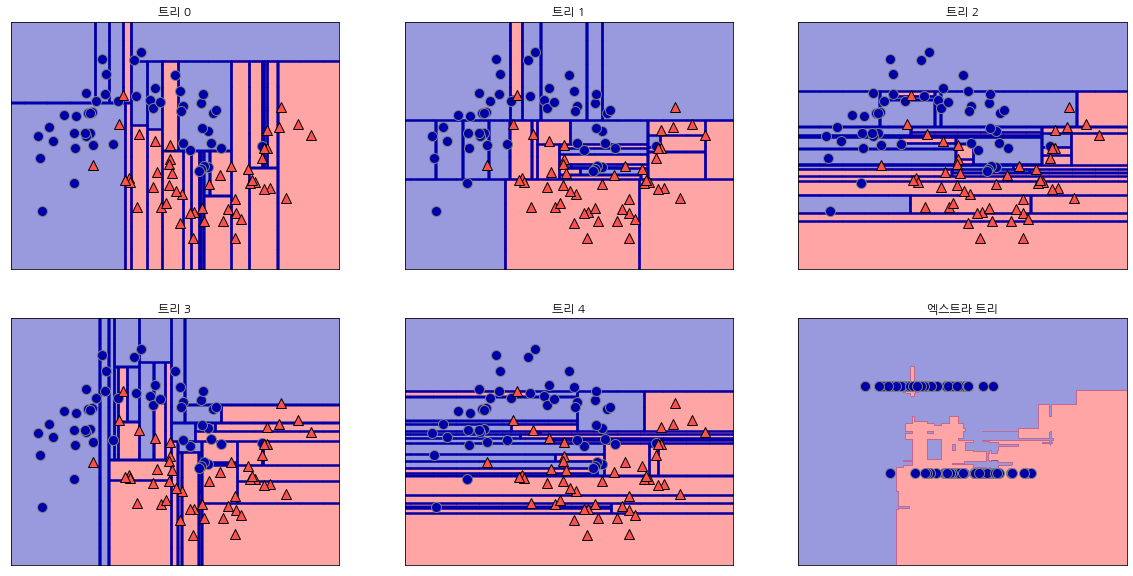

In [26]:
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=5,n_jobs=-1,random_state=0)
xtree.fit(Xm_train,ym_train)

fig,axes = plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(),xtree.estimators_)):
    ax.set_title('트리 {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)
    
mglearn.plots.plot_2d_separator(xtree,Xm,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title('엑스트라 트리')
mglearn.discrete_scatter(Xm[:,1],ym)
plt.show()

In [27]:
bagging = BaggingClassifier(DecisionTreeClassifier(),n_estimators=100,
                            oob_score=True, n_jobs=-1,random_state=42)
bagging.fit(Xc_train,yc_train)

print('훈련 세트 정확도: {:.3f}'.format(bagging.score(Xc_train,yc_train)))
print('테스트 세트 정확도: {:.3f}'.format(bagging.score(Xc_test,yc_test)))
print('OOB 샘플의 정확도: {:.3f}'.format(bagging.oob_score_))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.965
OOB 샘플의 정확도: 0.948


### 엑스트라 트리

- 후보 특성을 무작위로 분할한 다음 최적의 분할 찾음
- DecisionTreeClassifier(splitter='random') 사용
- 부트스트랩 샘플링 적용하지 않음

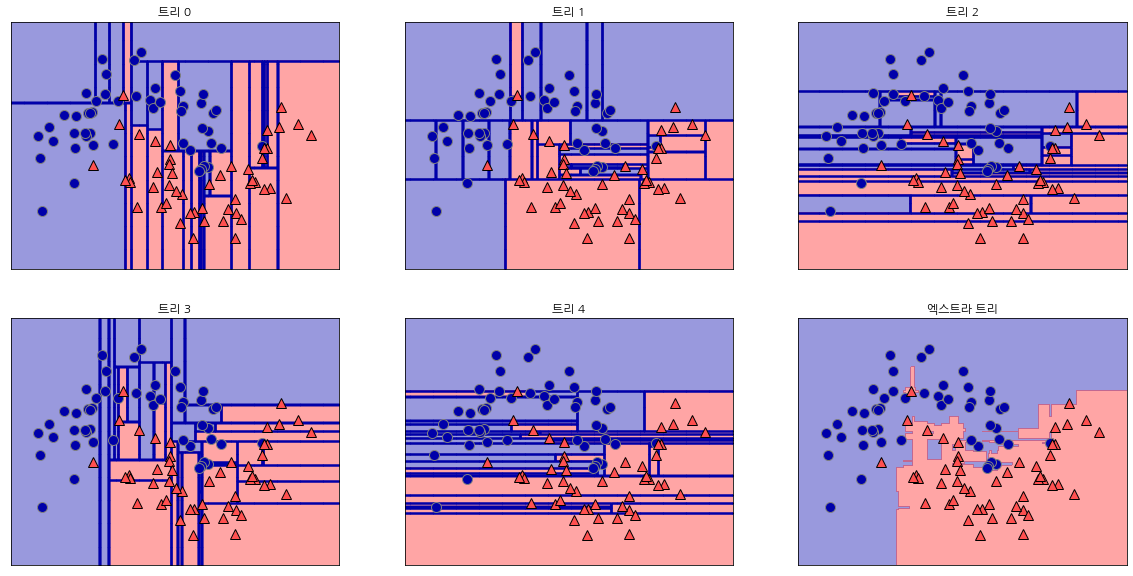

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
xtree = ExtraTreesClassifier(n_estimators=5,n_jobs=-1,random_state=0)
xtree.fit(Xm_train,ym_train)

fig,axes = plt.subplots(2,3,figsize=(20,10))
for i,(ax,tree) in enumerate(zip(axes.ravel(),xtree.estimators_)):
    ax.set_title('트리 {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)
    
mglearn.plots.plot_2d_separator(xtree,Xm,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title('엑스트라 트리')
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

In [29]:
xtree = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=0)
xtree.fit(Xc_train,yc_train)

print('훈련 세트 정확도: {:.3f}'.format(xtree.score(Xc_train,yc_train)))
print('테스트 세트 정확도: {:.3f}'.format(xtree.score(Xc_test,yc_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.972


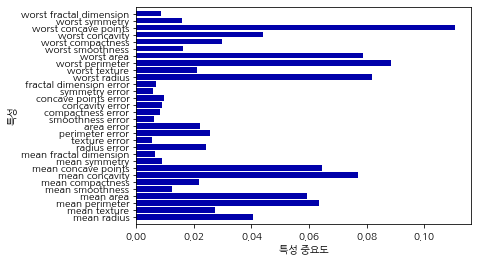

In [30]:
n_features = cancer.data.shape[1]
plt.barh(range(n_features),xtree.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('특성 중요도')
plt.ylabel('특성')
plt.ylim(-1,n_features)
plt.show()

### 에이다부스트

- Adaptive Boosting
- 약한 학습기 사용
- 이전의 모델이 잘못 분류한 샘플에 가중치를 높여 다음 모델을 훈련
- 모델이 예측한 레이블을 기준으로 모델의 가중치를 합산해 가장 높은 값을 가진 레이블을 선택합니다.

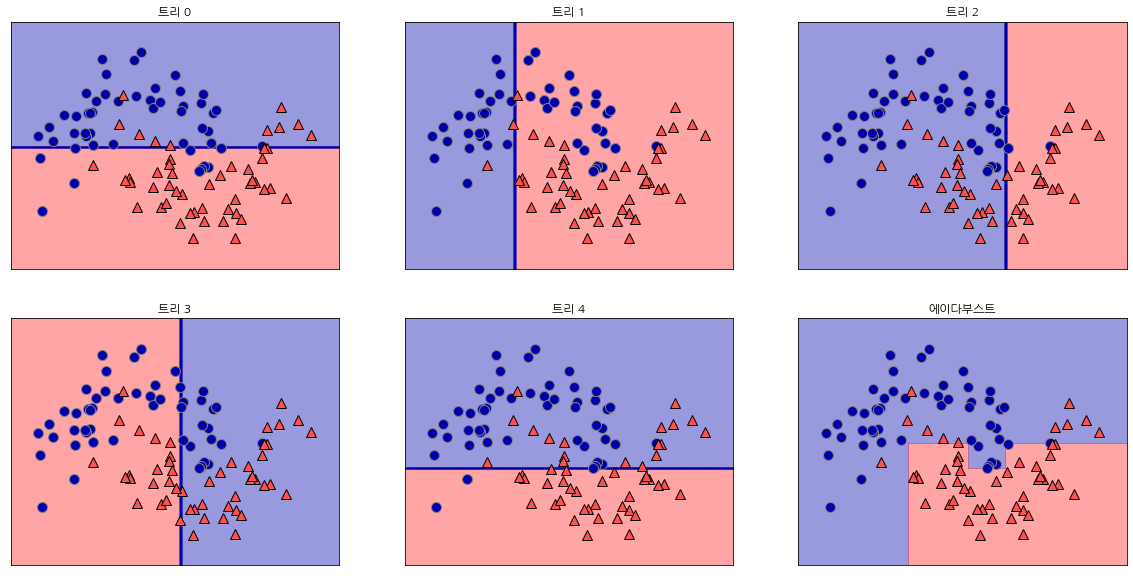

In [31]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=5,random_state=42)
ada.fit(Xm_train,ym_train)

fig,axes=plt.subplots(2,3,figsize=(20,10))
for i, (ax,tree) in enumerate(zip(axes.ravel(),ada.estimators_)):
    ax.set_title('트리 {}'.format(i))
    mglearn.plots.plot_tree_partition(Xm,ym,tree,ax=ax)
    
mglearn.plots.plot_2d_separator(ada,Xm,fill=True,ax=axes[-1,-1],alpha=.4)
axes[-1,-1].set_title('에이다부스트')
mglearn.discrete_scatter(Xm[:,0],Xm[:,1],ym)
plt.show()

In [32]:
ada = AdaBoostClassifier(n_estimators=100,random_state=42)
ada.fit(Xc_train,yc_train)

print('훈련 세트 정확도: {:.3f}'.format(ada.score(Xc_train,yc_train)))
print('테스트 세트 정확도: {:.3f}'.format(ada.score(Xc_test,yc_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.986


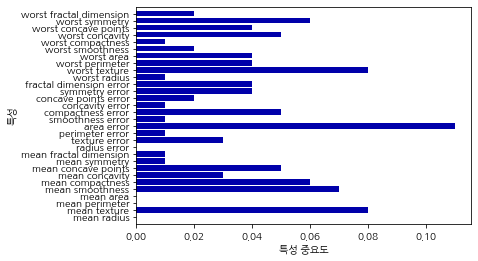

In [33]:
plt.barh(range(n_features),ada.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.xlabel('특성 중요도')
plt.ylabel('특성')
plt.ylim(-1,n_features)
plt.show()